<h1 align="center">Modelo de Cole-Cole</h1>
<div align="right">Por David A. Miranda, PhD<br>2020</div>
<h2>1. Importa las librerias</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# 2. El modelo de Cole-Cole
En 1941 Kenneth Cole y Robet Cole [<a href="https://doi.org/10.1063/1.1750906" target="blank">Cole and Cole. J. Chem. Phys. 9 (1941) 341</a>], inspirados en la ecuación de Debye para la permitibidad eléctrica de medios homogeneos, analizaron las propiedades dieléctricas para medios hetereogeneos y propusieron una ecuación para describirlas, ecuación conocida hoy en día como modelo de Cole-Cole:

$$\varepsilon^* = \varepsilon_\infty + \frac{\varepsilon_s - \varepsilon_\infty}{1 + (j\omega\tau_0)^{1-\alpha}} \qquad (1)$$

Donde $\tau_0$ es el tiempo de relajación medio y $\alpha$, un parámetro relacionado con la heterogeneidad del medio.

In [2]:
epsilon_s = 100e-6 # F/m^2
epsilon_i =  10e-6 # F/m^2
pi = np.pi
tau = 1e-4/(2*pi) # s
a = 0.4

f = np.logspace(1, 7, 1000)
w = 2*pi*f

epsilon = epsilon_i + (epsilon_s - epsilon_i)/(1 + (1j*w*tau)**(1-a))
debye = epsilon_i + (epsilon_s - epsilon_i)/(1 + 1j*w*tau)

## 2.1. Parte real e imaginaria

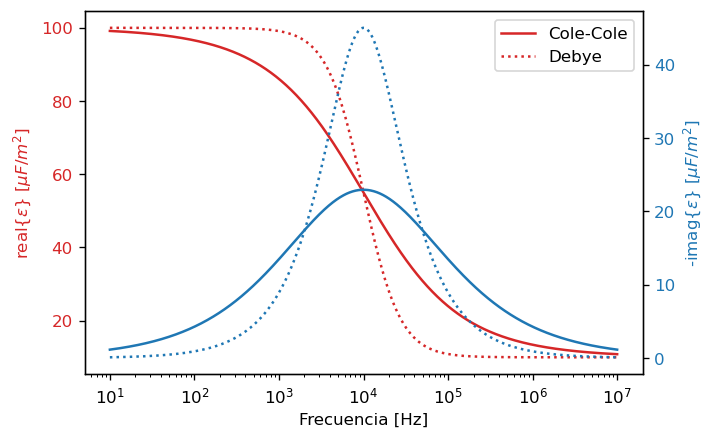

In [3]:
fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel(r'real{$\varepsilon$} $[\mu F/m^2]$', color=color)
ax1.semilogx(f,  1e6*epsilon.real, color=color, label='Cole-Cole')
ax1.semilogx(f,  1e6*debye.real, ':', color=color, label='Debye')
ax1.tick_params(axis='y', labelcolor=color)

plt.legend()

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'-imag{$\varepsilon$} $[\mu F / m^2]$', color=color) 
ax2.semilogx(f, -1e6*epsilon.imag, color=color)
ax2.semilogx(f, -1e6*debye.imag, ':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

## 2.2. Magnitud y fase

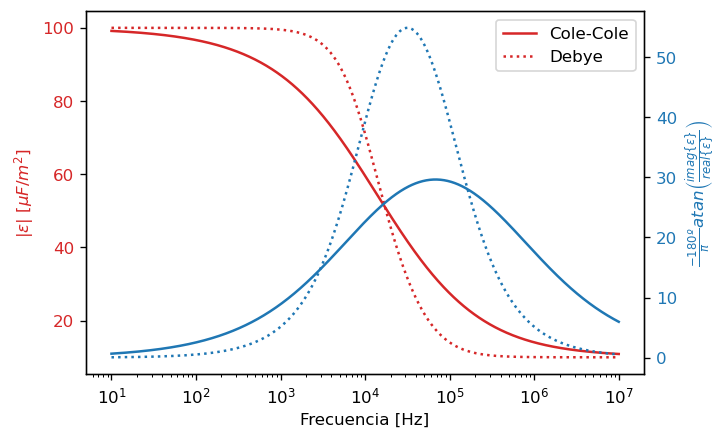

In [4]:
fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel(r'$|\varepsilon|$ $[\mu F/m^2]$', color=color)
ax1.semilogx(f,  1e6*np.abs(epsilon), color=color, label='Cole-Cole')
ax1.semilogx(f,  1e6*np.abs(debye), ':', color=color, label='Debye')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'$\frac{-180º}{\pi}atan\left(\frac{imag\{\varepsilon\}}{real\{\varepsilon\}}\right)$', color=color) 
ax2.semilogx(f, -180/pi *np.angle(epsilon), color=color)
ax2.semilogx(f, -180/pi *np.angle(debye), ':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

## 2.3. Diagrama de Nyquist

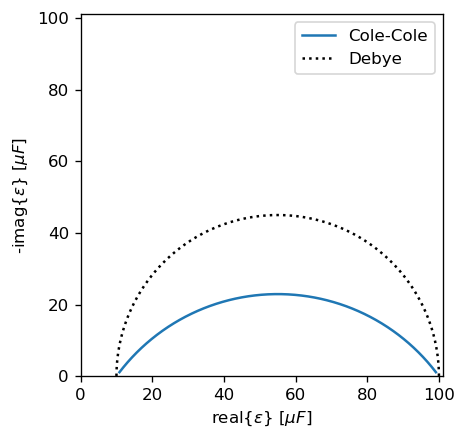

In [5]:
plt.figure(dpi=120)
plt.plot(1e6*epsilon.real, -1e6*epsilon.imag, label='Cole-Cole')
plt.plot(1e6*debye.real, -1e6*debye.imag, ':k', label='Debye')
plt.xlabel(r'real{$\varepsilon$} $[\mu F]$')
plt.ylabel(r'-imag{$\varepsilon$} $[\mu F]$')
plt.gca().set_aspect('equal')
xy_max = 1.02*max([max(1e6*epsilon.real), max(-1e6*epsilon.imag)])
plt.legend()
_ = plt.axis([0, xy_max, 0, xy_max])

# 3. Conductividad eléctrica
La permitividad compleja $\varepsilon^*$ se relacinoa con la conductividad compleja $\sigma^*$ por medio de la siguiente expresión,

$$\sigma^* = j\omega \varepsilon^*$$

In [6]:
sigma = 1j*w*epsilon

## 3.1. Parte real e imaginaria

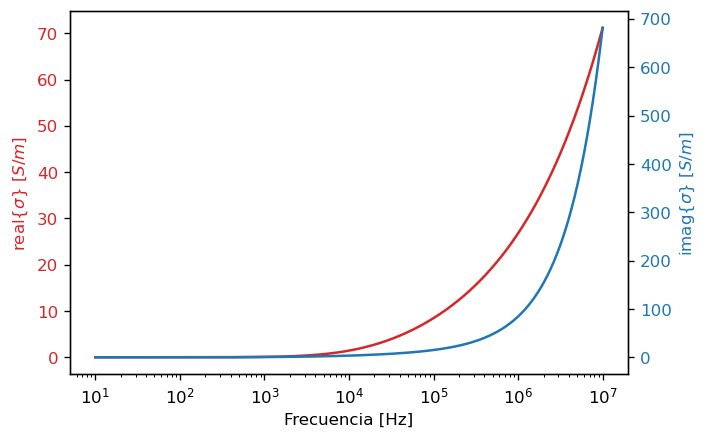

In [7]:
fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel(r'real{$\sigma$} $[S/m]$', color=color)
ax1.semilogx(f,  sigma.real, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'imag{$\sigma$} $[S/m]$', color=color) 
ax2.semilogx(f, sigma.imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)

## 3.2. Magnitud y fase

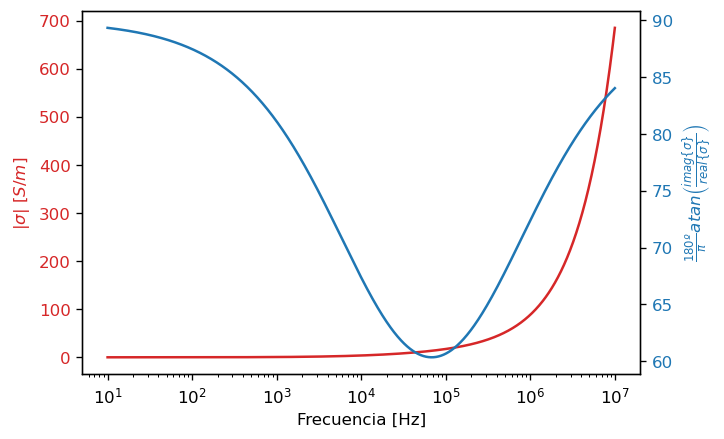

In [8]:
fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel(r'$|\sigma|$ $[S/m]$', color=color)
ax1.semilogx(f,  np.abs(sigma), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'$\frac{180º}{\pi}atan\left(\frac{imag\{\sigma\}}{real\{\sigma\}}\right)$', color=color) 
ax2.semilogx(f, 180/pi *np.angle(sigma), color=color)
ax2.tick_params(axis='y', labelcolor=color)

## 3.3. Diagrama de Niquist

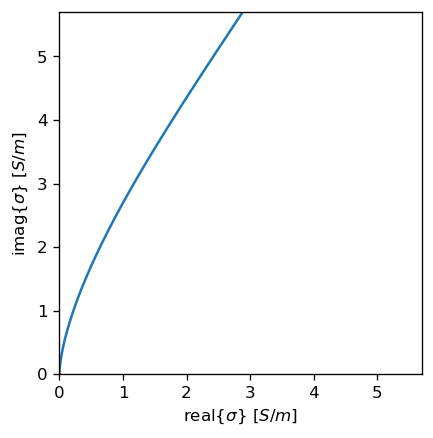

In [9]:
plt.figure(dpi=120)
plt.plot(sigma.real, sigma.imag)
plt.xlabel(r'real{$\sigma$} $[S/m]$')
plt.ylabel(r'imag{$\sigma$} $[S/m]$')
plt.gca().set_aspect('equal')
_ = plt.axis([0, 5.7, 0, 5.7])

# 4. Resistividad eléctrica
La resistividad eléctirca compleja $\rho^*$ es el inverso de la conductividad eléctrica compleja.

In [10]:
rho = 1/sigma

## 4.1. Parte real e imaginaria

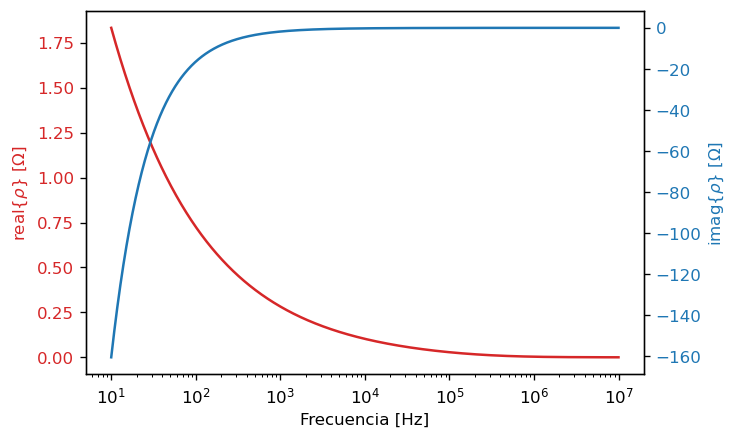

In [11]:
fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel(r'real{$\rho$} $[\Omega]$', color=color)
ax1.semilogx(f,  rho.real, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'imag{$\rho$} $[\Omega]$', color=color) 
ax2.semilogx(f, rho.imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)

## 4.2. Magnitud y fase

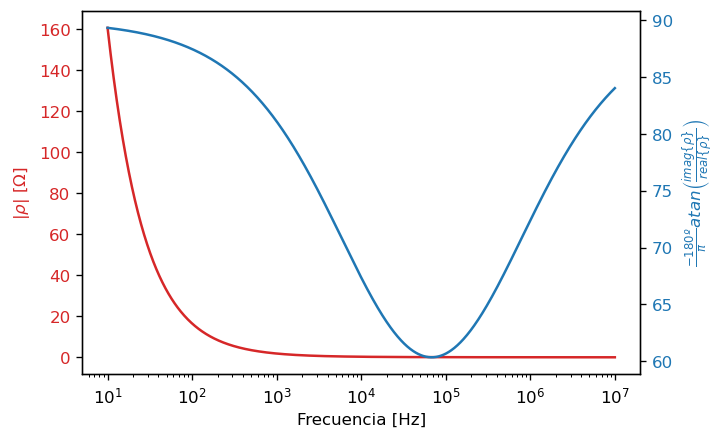

In [12]:
fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel(r'$|\rho|$ $[\Omega]$', color=color)
ax1.semilogx(f,  np.abs(rho), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'$\frac{-180º}{\pi}atan\left(\frac{imag\{\rho\}}{real\{\rho\}}\right)$', color=color) 
ax2.semilogx(f, -180/pi *np.angle(rho), color=color)
ax2.tick_params(axis='y', labelcolor=color)

## 4.3. Diagrama de Nyquist

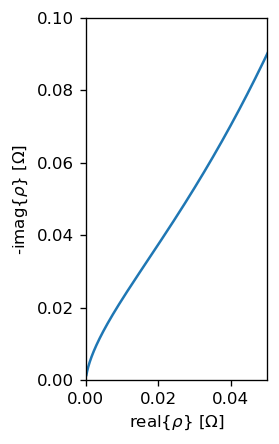

In [13]:
plt.figure(dpi=120)
plt.plot(rho.real, -rho.imag)
plt.xlabel(r'real{$\rho$} $[\Omega]$')
plt.ylabel(r'-imag{$\rho$} $[\Omega]$')
plt.gca().set_aspect('equal')
_ = plt.axis([0, 0.05, 0, 0.10])

End!